In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from statistics import mode
from scipy.special import binom
from scipy.stats import iqr
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
# data without outlier - removed by dbscan
df = pd.read_excel('clean_data.xlsx')

In [3]:
df

,Unnamed: 0,a,b,c,d,e,f,g,h,i,Cluster
0,0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07,0
1,2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,0
2,3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00,0
3,4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00,0
4,5,1.51721,12.87,3.48,1.33,73.04,0.56,8.43,0.00,0.00,0
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,0
6,8,1.51747,12.84,3.50,1.14,73.27,0.56,8.55,0.00,0.00,0
7,9,1.52121,14.03,3.76,0.58,71.79,0.11,9.65,0.00,0.00,0
8,10,1.51736,12.78,3.62,1.29,72.79,0.59,8.70,0.00,0.00,0
9,11,1.51640,12.55,3.48,1.87,73.23,0.63,8.08,0.00,0.09,0


In [4]:
df = df.drop(['Unnamed: 0','Cluster'],axis = 1)

In [9]:
df.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.0,0.07
1,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03
2,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.0,0.00
3,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.0,0.00
4,1.51721,12.87,3.48,1.33,73.04,0.56,8.43,0.0,0.00


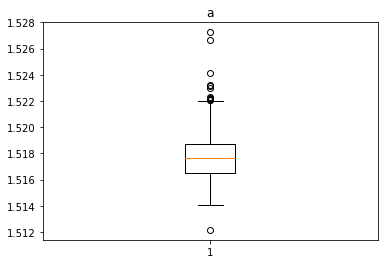

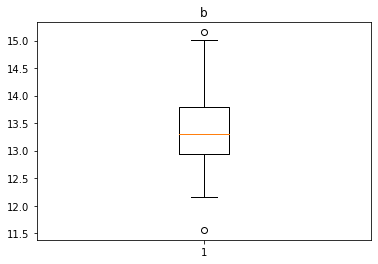

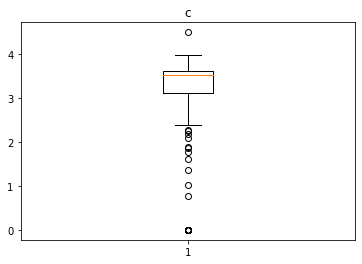

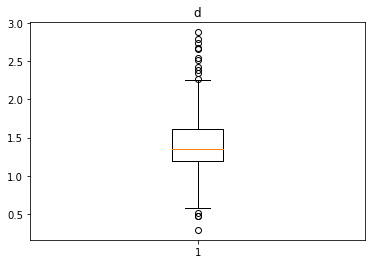

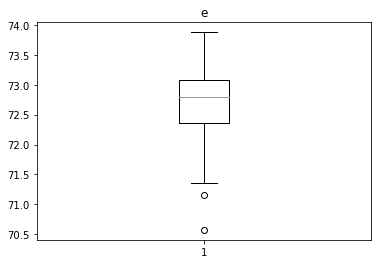

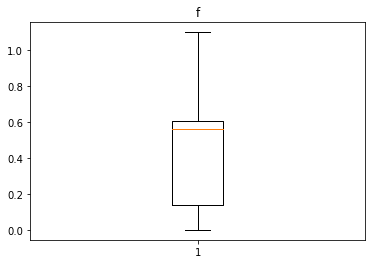

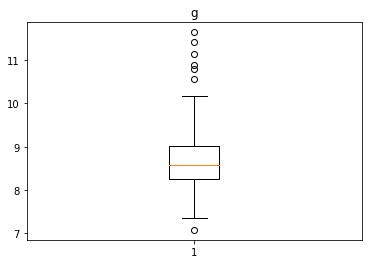

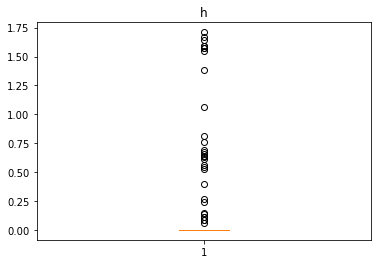

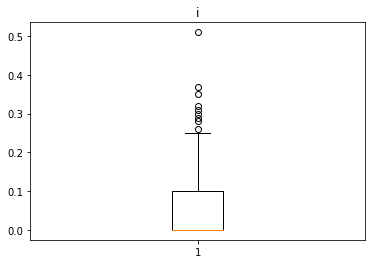

In [5]:
for i in df.columns:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


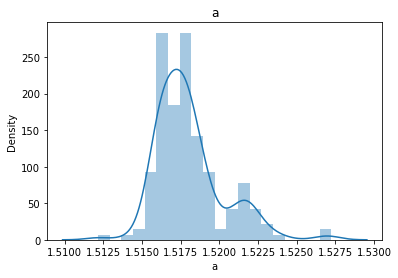

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


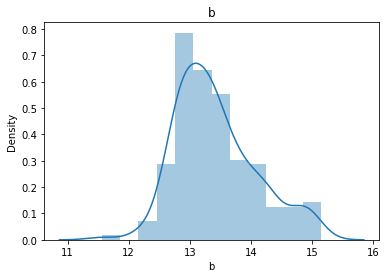

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


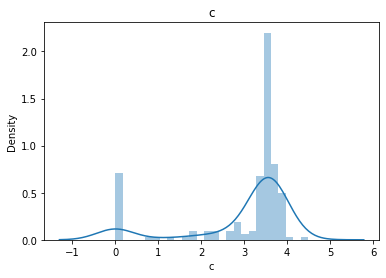

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


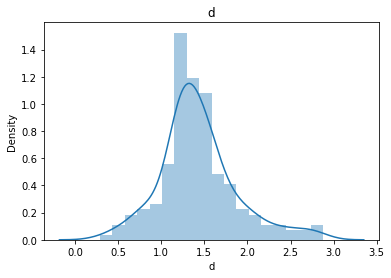

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


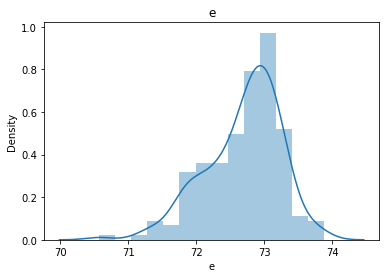

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


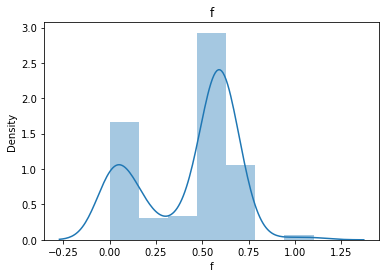

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


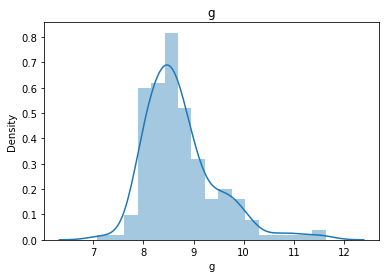

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


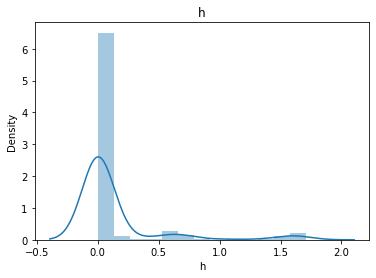

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


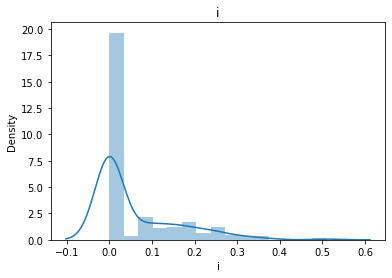

In [6]:
for i in df.columns:
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

## K-Means Clustering

In [8]:
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import	KMeans

In [9]:
Univ_num = df.copy()

In [10]:
## Function to check skewness
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


a's: Skew: 1.28915974051036, : SkewtestResult(statistic=5.954847125339176, pvalue=2.603150467097453e-09)
b's: Skew: 0.6353645920404457, : SkewtestResult(statistic=3.408038569892048, pvalue=0.000654316453508485)


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


c's: Skew: -1.749853045034102, : SkewtestResult(statistic=-7.278891245353052, pvalue=3.365748682064633e-13)
d's: Skew: 0.7165161661899857, : SkewtestResult(statistic=3.77815626726412, pvalue=0.00015799373294127147)
e's: Skew: -0.7506944718210881, : SkewtestResult(statistic=-3.9290296205852053, pvalue=8.528933451195853e-05)

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



f's: Skew: -0.5625659369797347, : SkewtestResult(statistic=-3.0616268084262344, pvalue=0.0022013772454625114)
g's: Skew: 1.3075016768729764, : SkewtestResult(statistic=6.01371175301858, pvalue=1.8132280702202598e-09)


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


h's: Skew: 3.108320598922699, : SkewtestResult(statistic=9.96868766920714, pvalue=2.0897165048785652e-23)


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


i's: Skew: 1.7252979300832587, : SkewtestResult(statistic=7.215550006814637, pvalue=5.371641552110006e-13)


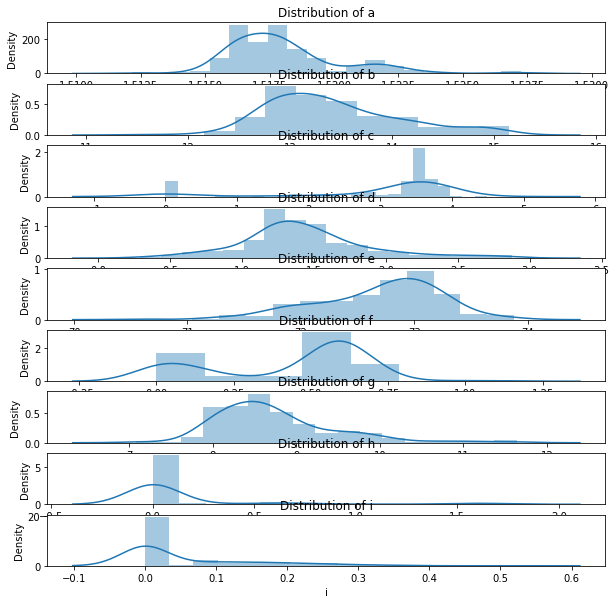

In [11]:
plt.figure(figsize=(10, 10))
plt.subplot(9, 1, 1)
check_skew(Univ_num,'a')
plt.subplot(9, 1, 2)
check_skew(Univ_num,'b')
plt.subplot(9, 1, 3)
check_skew(Univ_num,'c')
plt.subplot(9, 1, 4)
check_skew(Univ_num,'d')
plt.subplot(9, 1, 5)
check_skew(Univ_num,'e')
plt.subplot(9, 1, 6)
check_skew(Univ_num,'f')
plt.subplot(9, 1, 7)
check_skew(Univ_num,'g')
plt.subplot(9, 1, 8)
check_skew(Univ_num,'h')
plt.subplot(9, 1, 9)
check_skew(Univ_num,'i')

In [12]:
#Reduce Skewness with log transform
df_rfm_log = np.log(Univ_num+1)

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


a's: Skew: 1.28552866725172, : SkewtestResult(statistic=5.943125417910344, pvalue=2.796383133216692e-09)
b's: Skew: 0.5158238689051917, : SkewtestResult(statistic=2.8320415704877706, pvalue=0.004625183513001435)


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


c's: Skew: -2.01610829617065, : SkewtestResult(statistic=-7.922880485501362, pvalue=2.3207061700544867e-15)
d's: Skew: -0.07743513729040383, : SkewtestResult(statistic=-0.44758301915619275, pvalue=0.6544541605015268)


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


e's: Skew: -0.7738938940559991, : SkewtestResult(statistic=-4.029771945797312, pvalue=5.583099198943222e-05)
f's: Skew: -0.720825268663197, : SkewtestResult(statistic=-3.797340158898217, pvalue=0.00014625702610184432)


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


g's: Skew: 1.0345759959902168, : SkewtestResult(statistic=5.073829915797988, pvalue=3.8988757799696874e-07)
h's: Skew: 2.744043819133279, : SkewtestResult(statistic=9.37033337400374, pvalue=7.230378947417045e-21)


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


i's: Skew: 1.5394038564849273, : SkewtestResult(statistic=6.711450121438055, pvalue=1.926996655798678e-11)


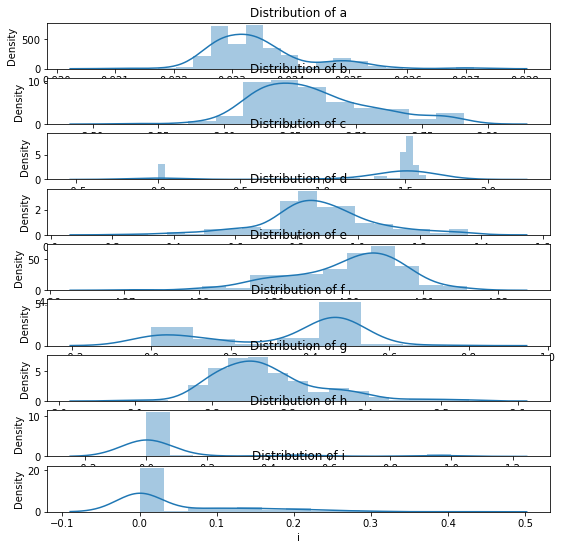

In [13]:
plt.figure(figsize=(9, 9))
plt.subplot(9, 1, 1)
check_skew(df_rfm_log,'a')
plt.subplot(9, 1, 2)
check_skew(df_rfm_log,'b')
plt.subplot(9, 1, 3)
check_skew(df_rfm_log,'c')
plt.subplot(9, 1, 4)
check_skew(df_rfm_log,'d')
plt.subplot(9, 1, 5)
check_skew(df_rfm_log,'e')
plt.subplot(9, 1, 6)
check_skew(df_rfm_log,'f')
plt.subplot(9, 1, 7)
check_skew(df_rfm_log,'g')
plt.subplot(9, 1, 8)
check_skew(df_rfm_log,'h')
plt.subplot(9, 1, 9)
check_skew(df_rfm_log,'i')

In [14]:
# scale data
scaler = StandardScaler()
scaler.fit(df_rfm_log)
Table_scaled = scaler.transform(df_rfm_log)
Table_scaled 

array([[-0.30806137, -0.60666274,  0.44122002, ..., -0.39764173,
        -0.37876902,  0.1748229 ],
       [ 2.29602712, -0.15117648,  0.45862263, ...,  1.97815363,
        -0.37876902, -0.27215038],
       [-0.15580353, -1.34884836,  0.43246113, ..., -0.24886822,
        -0.37876902, -0.6189233 ],
       ...,
       [ 0.21322359,  0.35603943,  0.58042314, ..., -0.57826435,
        -0.37876902,  2.6381494 ],
       [-0.08198872, -1.15283501,  0.49722918, ..., -0.0140441 ,
        -0.37876902, -0.6189233 ],
       [ 0.18093839, -0.7499379 ,  0.52674555, ...,  0.35940632,
        -0.37876902,  1.71392132]])

In [15]:
Table_scaled = pd.DataFrame(Table_scaled, columns = df_rfm_log.columns)
Table_scaled.head()

,a,b,c,d,e,f,g,h,i
0,-0.308061,-0.606663,0.441220,0.653893,0.075458,0.486304,-0.397642,-0.378769,0.174823
1,2.296027,-0.151176,0.458623,-1.504733,-1.268337,-1.156845,1.978154,-0.378769,-0.272150
2,-0.155804,-1.348848,0.432461,0.092282,0.832165,0.585852,-0.248868,-0.378769,-0.618923
3,0.051789,0.034606,0.624735,-0.507543,-0.358884,0.618613,-0.838168,-0.378769,-0.618923
4,-0.372662,-0.845970,0.414826,-0.139893,0.634395,0.552883,-0.412606,-0.378769,-0.618923


In [17]:
# plot elbow curve
from scipy.spatial.distance import cdist
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(Table_scaled) 
    kmeanModel.fit(Table_scaled)     
      
    distortions.append(sum(np.min(cdist(Table_scaled, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / Table_scaled.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(Table_scaled, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / Table_scaled.shape[0] 
    mapping2[k] = kmeanModel.inertia_

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows wi

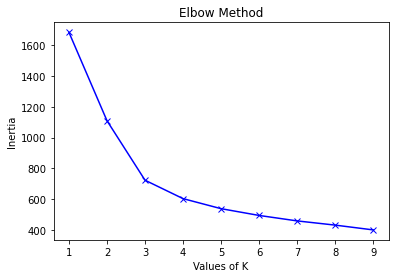

In [18]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\manifold\_t

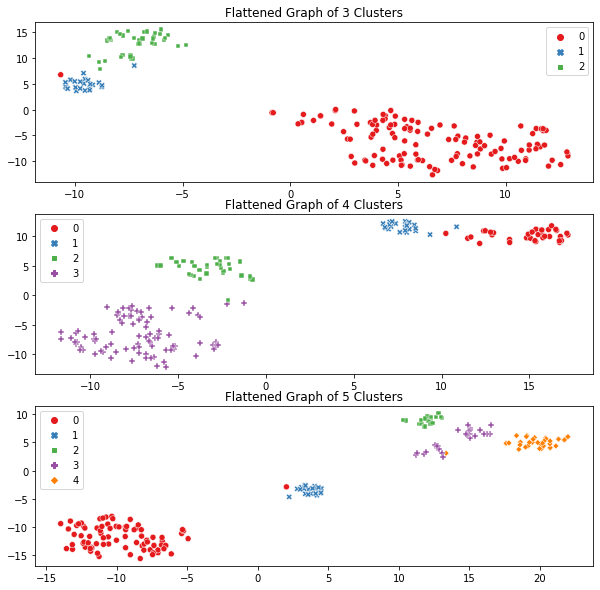

In [19]:
from sklearn.manifold import TSNE
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)
# Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new
plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(Table_scaled, 3, df)
plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(Table_scaled, 4, df)
plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(Table_scaled, 5, df)

In [21]:
def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):
    normalised_df_rfm = pd.DataFrame(normalised_df_rfm, 
                                       index=df.index, 
                                       columns=df.columns)
    normalised_df_rfm['Cluster'] = df_rfm_kmeans['Cluster']
# Melt data into long format
    df_melt = pd.melt(normalised_df_rfm.reset_index(), 
                        id_vars=['Cluster'],
                        value_vars=['a', 'b', 'c','d','e','f','g','h','i'], 
                        var_name='Metric', 
                        value_name='Value')
    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')
    
    return

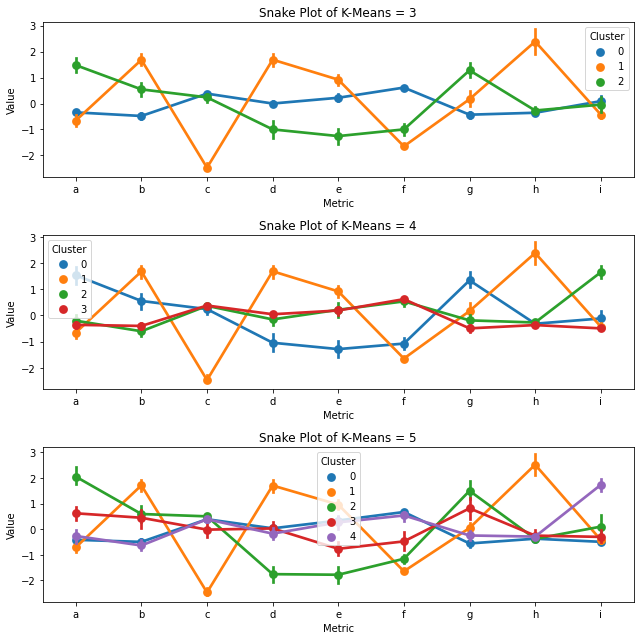

In [22]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
plt.title('Snake Plot of K-Means = 3')
snake_plot(Table_scaled, df_rfm_k3, df)

plt.subplot(3, 1, 2)
plt.title('Snake Plot of K-Means = 4')
snake_plot(Table_scaled, df_rfm_k4, df)

plt.subplot(3, 1, 3)
plt.title('Snake Plot of K-Means = 5')
snake_plot(Table_scaled, df_rfm_k5, df)
plt.tight_layout()

In [23]:
def cluster(df):

    df_new = df.groupby(['Cluster']).agg({
        'a': 'median',
        'b': 'median',
        'c': 'median',
        'd': 'median',
        'e': 'median',
        'f': 'median',
        'g': 'median',
        'h': 'median',
        'i': ['median', 'count']
    })
    
    return df_new

In [24]:
cluster(df_rfm_k3)

a      b      c      d      e      f      g      h      i      
          median median median median median median median median median count
Cluster                                                                       
0        1.51747  13.08   3.52   1.35  72.86   0.59   8.41   0.00    0.0   125
1        1.51640  14.56   0.00   2.25  73.23   0.00   8.67   0.76    0.0    23
2        1.52152  13.79   3.62   0.90  71.99   0.12   9.57   0.00    0.0    39

In [25]:
cluster(df_rfm_k4)

a       b      c      d       e      f      g      h      i  \
           median  median median median  median median median median median   
Cluster                                                                       
0        1.521520  13.795  3.650  0.900  71.990   0.11  9.630   0.00  0.000   
1        1.516400  14.560  0.000  2.250  73.230   0.00  8.670   0.76  0.000   
2        1.517720  12.960  3.530  1.285  72.915   0.58  8.480   0.00  0.215   
3        1.517355  13.205  3.525  1.365  72.845   0.59  8.405   0.00  0.000   

               
        count  
Cluster        
0          36  
1          23  
2          36  
3          92

In [26]:
cluster(df_rfm_k5)

a       b      c      d       e      f      g      h      i  \
           median  median median median  median median median median median   
Cluster                                                                       
0        1.517200  13.090  3.540  1.360  72.870  0.590  8.320  0.000   0.00   
1        1.516315  14.630  0.000  2.260  73.255  0.000  8.670  0.785   0.00   
2        1.522105  13.815  3.755  0.805  71.770  0.115  9.715  0.000   0.00   
3        1.519110  13.690  3.340  1.370  72.180  0.330  9.000  0.000   0.00   
4        1.517690  12.930  3.540  1.270  72.950  0.580  8.440  0.000   0.22   

               
        count  
Cluster        
0          83  
1          22  
2          20  
3          29  
4          33

In [72]:
df.head()

,e,f,a,b,d,g,h,i
0,72.73,0.54,0.653994,1.292117,0.687904,1.177102,0.0,0.065468
1,71.99,0.12,0.655159,1.297725,0.469276,1.227660,0.0,0.029130
2,73.15,0.57,0.654062,1.282911,0.635460,1.180344,0.0,0.000000
3,72.49,0.58,0.654155,1.300003,0.576234,1.167440,0.0,0.000000
4,73.04,0.56,0.653965,1.289158,0.612950,1.176775,0.0,0.000000


In [27]:
df_rfm_k4.head()

,a,b,c,d,e,f,g,h,i,Cluster
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.0,0.07,3
1,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,0
2,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.0,0.00,3
3,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.0,0.00,3
4,1.51721,12.87,3.48,1.33,73.04,0.56,8.43,0.0,0.00,3


In [42]:
df_rfm_k4.columns

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'Cluster'], dtype='object')

In [43]:
result = df_rfm_k4.copy()

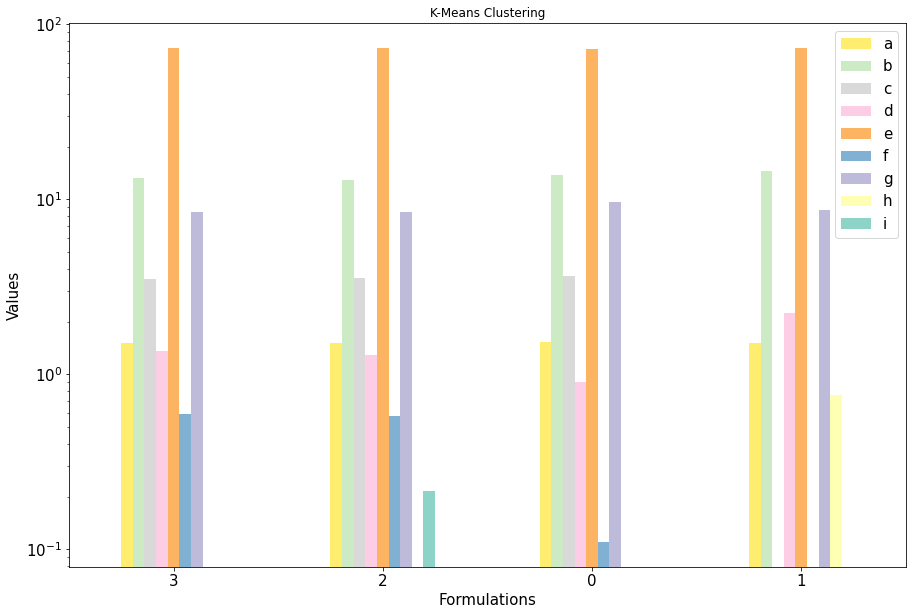

In [44]:
grouped_Univ = result[['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i','Cluster']].groupby('Cluster').median()
grouped_Univ.sort_values(['f'], ascending=False,inplace=True)
myfig = grouped_Univ.plot(kind='bar',logy=True, colormap='Set3_r', fontsize=15, figsize=(15,10)) 
#plt.legend(bbox_to_anchor=(x,y))  
#plt.yticks(rotation=0)
plt.title("K-Means Clustering")
#plt.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold')
plt.xticks(rotation=0)
plt.xlabel('Formulations', fontsize=15)
plt.ylabel('Values', fontsize=15)
plt.legend(fontsize=15) # using a size in points
#plt.legend(loc="upper left", bbox_to_anchor=(1,1),fontsize=12) 
plt.show()

In [45]:
# Rename clusters with credit score segment
result.loc[result['Cluster'] == 3,'Cluster'] ='Formulation 1'
result.loc[result['Cluster'] == 2,'Cluster'] ='Formulation 2'
result.loc[result['Cluster'] == 0,'Cluster'] ='Formulation 3'
result.loc[result['Cluster'] == 1,'Cluster'] ='Formulation 4'


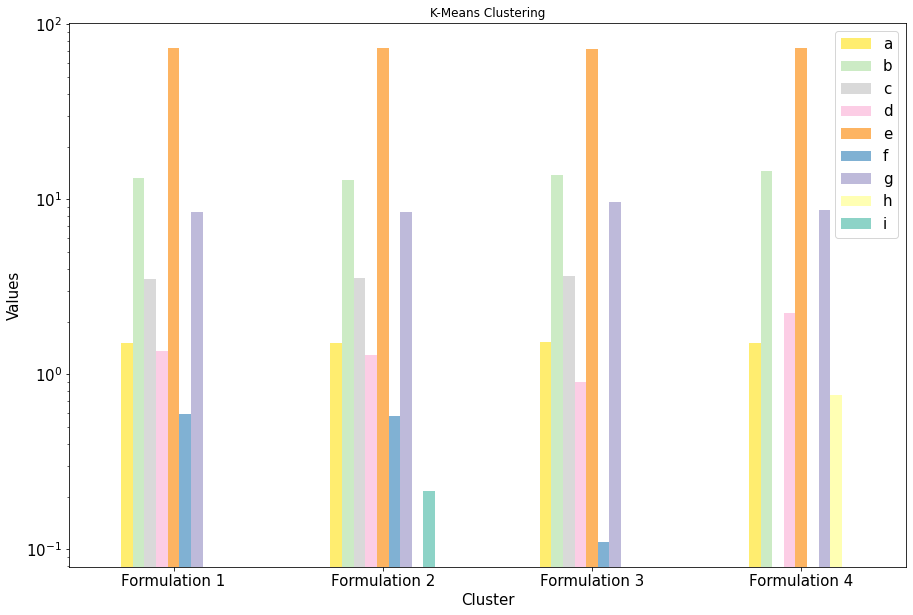

In [46]:
grouped_Univ = result[['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i','Cluster']].groupby('Cluster').median()
grouped_Univ.sort_values(['f'], ascending=False,inplace=True)
myfig = grouped_Univ.plot(kind='bar',logy=True, colormap='Set3_r', fontsize=15, figsize=(15,10)) 
#plt.legend(bbox_to_anchor=(x,y))  
#plt.yticks(rotation=0)
plt.title("K-Means Clustering")
#plt.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold')
plt.xticks(rotation=0)
plt.xlabel('Cluster', fontsize=15)
plt.ylabel('Values', fontsize=15)
plt.legend(fontsize=15) # using a size in points
#plt.legend(loc="upper left", bbox_to_anchor=(1,1),fontsize=12) 
plt.show()

In [47]:
result.pivot_table(index=["Cluster"], 
                          values=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i'], 
                          aggfunc={"a": [np.min, np.median, np.max], 
                                   "b": [np.min, np.median, np.max], 
                                   "c": [np.min, np.median, np.max],
                                   "d": [np.min, np.median, np.max],
                                   "e": [np.min, np.median, np.max],
                                   "f": [np.min, np.median, np.max],
                                   "g": [np.min, np.median, np.max],
                                   "h": [np.min, np.median, np.max],                             
                                   "i": [np.min, np.median, np.max, "count"]})

# Formulation 1 is outlier group

a                         b                    c        \
                  amax     amin    median   amax   amin  median  amax  amin   
Cluster                                                                       
Formulation 1  1.52177  1.51409  1.517355  14.86  12.16  13.205  3.98  0.00   
Formulation 2  1.52068  1.51215  1.517720  13.92  12.20  12.960  3.93  1.61   
Formulation 3  1.52725  1.51779  1.521520  14.99  11.56  13.795  4.49  0.78   
Formulation 4  1.52065  1.51508  1.516400  15.15  13.87  14.560  1.78  0.00   

                         d                   e                    f        \
              median  amax  amin median   amax   amin  median  amax  amin   
Cluster                                                                     
Formulation 1  3.525  2.12  1.05  1.365  73.88  71.81  72.845  1.10  0.11   
Formulation 2  3.530  2.17  0.75  1.285  73.81  71.81  72.915  0.76  0.07   
Formulation 3  3.650  1.74  0.29  0.900  73.00  70.57  71.990  0.60  0.00   
Formulation 4  0.000  2.88  1.79  2.250  73.72  72.61  73.230  0.14  0.00   

                          g                  h                 i              \
              median   amax  amin median  amax amin median  amax  amin count   
Cluster                                                                        
Formulation 1   0.59  10.17  7.08  8.405  0.14  0.0   0.00  0.12  0.00    92   
Formulation 2   0.58   9.70  7.94  8.480  0.27  0.0   0.00  0.51  0.11    36   
Formulation 3   0.11  11.64  8.67  9.630  0.69  0.0   0.00  0.37  0.00    36   
Formulation 4   0.00  10.88  8.28  8.670  1.71  0.0   0.76  0.09  0.00    23   

                      
              median  
Cluster               
Formulation 1  0.000  
Formulation 2  0.215  
Formulation 3  0.000  
Formulation 4  0.000

In [49]:
result[['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i','Cluster']].groupby('Cluster').median()

,a,b,c,d,e,f,g,h,i
Cluster,,,,,,,,,
Formulation 1,1.517355,13.205,3.525,1.365,72.845,0.59,8.405,0.00,0.000
Formulation 2,1.517720,12.960,3.530,1.285,72.915,0.58,8.480,0.00,0.215
Formulation 3,1.521520,13.795,3.650,0.900,71.990,0.11,9.630,0.00,0.000
Formulation 4,1.516400,14.560,0.000,2.250,73.230,0.00,8.670,0.76,0.000


### Insight
- Median values are not affected by the outliers

In [50]:
# create excel writer object
writer = pd.ExcelWriter('final_result2.xlsx')
# write dataframe to excel
result.to_excel(writer)
# save the excel
writer.save()